In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#!pip install keras

In [ ]:
import os

In [ ]:
import os.path
import keras
import pandas as pd
import numpy as np

In [ ]:
ROOT = '/content/drive/My Drive/SDC/'

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile(f"{ROOT}/07012018.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
#reading text file
text_data = pd.read_csv('/tmp/data.txt',header = None, sep = ",",names = ["image&angle", "Date&time"] )
text_data

,image&angle,Date&time
0,0.jpg 0.000000,2018-07-01 17:09:44:912
1,1.jpg 0.000000,2018-07-01 17:09:44:972
2,2.jpg 0.000000,2018-07-01 17:09:45:11
3,3.jpg 0.000000,2018-07-01 17:09:45:76
4,4.jpg 0.000000,2018-07-01 17:09:45:105
...,...,...
63820,63820.jpg -11.500000,2018-07-01 18:05:36:384
63821,63821.jpg -11.290000,2018-07-01 18:05:36:484
63822,63822.jpg -11.290000,2018-07-01 18:05:36:542
63823,63823.jpg -11.290000,2018-07-01 18:05:36:583


In [ ]:
new_text_data = text_data.drop("Date&time",axis = 1)
new_text_data

,image&angle
0,0.jpg 0.000000
1,1.jpg 0.000000
2,2.jpg 0.000000
3,3.jpg 0.000000
4,4.jpg 0.000000
...,...
63820,63820.jpg -11.500000
63821,63821.jpg -11.290000
63822,63822.jpg -11.290000
63823,63823.jpg -11.290000


In [ ]:
#Making dataframe having angle column
angles = new_text_data["image&angle"].str.split(" ")
data_rand = angles.to_list()
columns = ['image_name', 'angle']
angle = pd.DataFrame(data_rand, columns = columns)
angle
  

,image_name,angle
0,0.jpg,0.000000
1,1.jpg,0.000000
2,2.jpg,0.000000
3,3.jpg,0.000000
4,4.jpg,0.000000
...,...,...
63820,63820.jpg,-11.500000
63821,63821.jpg,-11.290000
63822,63822.jpg,-11.290000
63823,63823.jpg,-11.290000


In [ ]:
final_angle = angle.drop(axis=1,columns="image_name",index=None)
final_angle

,angle
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
63820,-11.500000
63821,-11.290000
63822,-11.290000
63823,-11.290000


In [ ]:
final_angle.info

<bound method DataFrame.info of             angle
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
...           ...
63820  -11.500000
63821  -11.290000
63822  -11.290000
63823  -11.290000
63824  -11.290000

[63825 rows x 1 columns]>

In [ ]:
final_angle.dtypes

angle    object
dtype: object

In [ ]:
final_angle.min()

angle   -0.1
dtype: float64

In [ ]:
final_angle.max()

angle    99.330002
dtype: float64

In [ ]:
data = angle.values
data.shape

(63825, 2)

In [ ]:
print(data[0])

['0.jpg' '0.000000']


In [ ]:
x_data = data[:,0]
y_data = data[:,1]
print(x_data.shape,y_data.shape)

(63825,) (63825,)


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
os.listdir("/tmp/")

['drivefs_ipc.0_shell',
 'data',
 '__MACOSX',
 'tmpymvf3ql1',
 'drivefs_ipc.0',
 'data.txt']

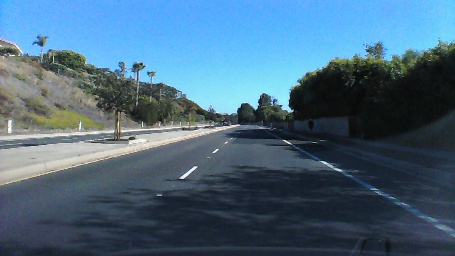

In [ ]:
src = '/tmp/data/0.jpg'
input_image = cv.imread(src)
scale_percent = 100 # Percent of the original image
width = int(input_image.shape[0] / 255)
height = int(input_image.shape[1] / 255)
dim = (width, height)

resized_img = cv.resize(input_image, dim, interpolation=cv.INTER_AREA)
cv2_imshow(input_image)
#plt.imshow("")

## Exploring our Dataset and pre-processing the images


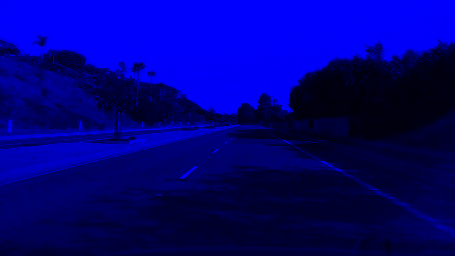

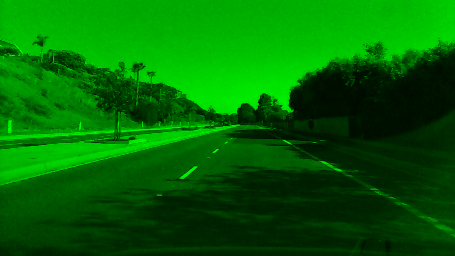

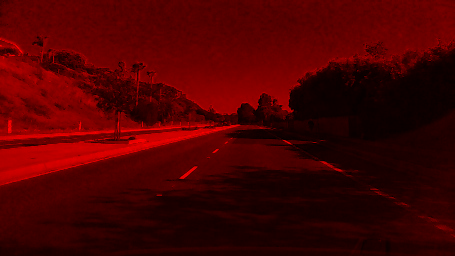

In [ ]:
cv.mixChannels([blue, green, red], [blue_channel], [0,0])
cv.mixChannels([blue, green, red], [green_channel], [1,1])
cv.mixChannels([blue, green, red], [red_channel], [2,2])
cv2_imshow(blue_channel)
cv2_imshow(green_channel)
cv2_imshow(red_channel)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

time: 1.23 ms


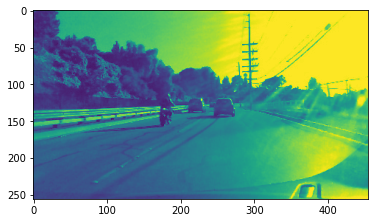

time: 202 ms


In [ ]:
from PIL import Image, ImageEnhance, ImageOps
im = Image.open('/tmp/data/60222.jpg')

im = ImageOps.grayscale(im) 
enhancer = ImageEnhance.Contrast(im)
factor = 1 #increase contrast
im_output = enhancer.enhance(factor)
plt.imshow(im_output)

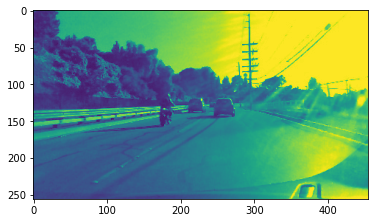

time: 197 ms


In [ ]:
#IMAGE WITH DIRECT SUNLIGHT GLARES ON IT
im = Image.open('/tmp/data/60222.jpg')
im = ImageOps.grayscale(im) 
matplotlib.pyplot.imshow(im)

<PIL.Image.Image image mode=RGB size=455x256 at 0x7FE3B98C8AC8> OUT
[array([[[0.49411765, 0.54509807, 0.6509804 ],
        [0.5176471 , 0.5686275 , 0.6627451 ],
        [0.45882353, 0.50980395, 0.5882353 ],
        ...,
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374]],

       [[0.3882353 , 0.42352942, 0.5137255 ],
        [0.45490196, 0.49019608, 0.57254905],
        [0.46666667, 0.49803922, 0.5686275 ],
        ...,
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374]],

       [[0.35686275, 0.3764706 , 0.43529412],
        [0.3529412 , 0.37254903, 0.42745098],
        [0.36862746, 0.38039216, 0.43137255],
        ...,
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374],
        [0.78431374, 0.78431374, 0.78431374]],

       ...,

       [[0.44313726, 0.3882353 , 0.40784314],

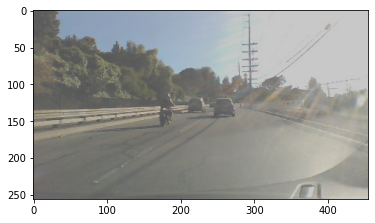

time: 222 ms


In [ ]:
from PIL import Image, ImageEnhance, ImageOps
for o in range(60222, 60223):
  img = image.load_img(f'/tmp/data/{o}.jpg',color_mode='grayscale',target_size=[100,100])
  for k in range(len(rgb_pixel_value)):
      if rgb_pixel_value[k] > 200:
        enhancer = ImageEnhance.Contrast(img)
        factor = 0.5 
        im_output = enhancer.enhance(factor)

  print(im_output, "OUT")

  plt.imshow(im_output)
  img = image.img_to_array(im_output)/255.0
  xd = []
  xd.append(img)
print(xd, "XD")

## Splitting our Dataset into train and validation set

In [ ]:
l = (int)(x_data.shape[0]*0.8)
xtrain = x_data[:l]
ytrain = y_data[:l]
xtest = x_data[l:]
ytest = y_data[l:]
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape) 

(51060,) (12765,) (51060,) (12765,)


In [ ]:
xtrain.dtype

dtype('O')

### Shuffle the test and validation set separetaly

In [ ]:
import random
c = list(zip(xtrain,ytrain))
random.shuffle(c)
xtrain,ytrain = zip(*c)


c = list(zip(xtest,ytest))
random.shuffle(c)
xtest,ytest = zip(*c)

In [ ]:
#ROOT = '/SDC/My Drive/SDC/selfdrivingcat/'
os.listdir(ROOT)

['07012018.zip', 'data', 'Weights', 'nw', 'Recording.mp4']

In [ ]:
Trainer = 0
Tester = 0
data_path = f'/tmp/data/'
#folder_path = fpt

In [ ]:
from keras.preprocessing import image
from tqdm import tqdm

In [ ]:
pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=4549cf670df24e9ed326c8a591a5cfd2df61df562f7424ccea755f566a773a8a
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime

In [ ]:
import tensorflow as tf

time: 647 µs


In [ ]:
print(xtest)

('56573.jpg', '60029.jpg', '61778.jpg', '59098.jpg', '54932.jpg', '52823.jpg', '51092.jpg', '63321.jpg', '51527.jpg', '58188.jpg', '55555.jpg', '57910.jpg', '60006.jpg', '61931.jpg', '63372.jpg', '58216.jpg', '60406.jpg', '52286.jpg', '51973.jpg', '54995.jpg', '57004.jpg', '52895.jpg', '54861.jpg', '56606.jpg', '55202.jpg', '55342.jpg', '56619.jpg', '55270.jpg', '63138.jpg', '55341.jpg', '55401.jpg', '57208.jpg', '58422.jpg', '59327.jpg', '63027.jpg', '57270.jpg', '58367.jpg', '55836.jpg', '51135.jpg', '63675.jpg', '52673.jpg', '63036.jpg', '57463.jpg', '54837.jpg', '59719.jpg', '59001.jpg', '62488.jpg', '62098.jpg', '52189.jpg', '56563.jpg', '63690.jpg', '61436.jpg', '54211.jpg', '62583.jpg', '51787.jpg', '56309.jpg', '58735.jpg', '58509.jpg', '56824.jpg', '60335.jpg', '51304.jpg', '60294.jpg', '53952.jpg', '52848.jpg', '59502.jpg', '59292.jpg', '61992.jpg', '57175.jpg', '56623.jpg', '56406.jpg', '55795.jpg', '52760.jpg', '62069.jpg', '54708.jpg', '56761.jpg', '56510.jpg', '56702.jpg'

In [ ]:
data.dtype

dtype('O')

time: 3.3 ms


In [ ]:
from keras.layers import Conv2D,Flatten, Dense, Dropout, MaxPooling2D
from keras.models import Sequential
import tensorflow as tf
from keras import regularizers
from keras.optimizers import Adam

time: 1.74 ms


# MODEL

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(100, 100, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                 
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                 
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                 
                                    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                 
                                    tf.keras.layers.Conv2D(512,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                 
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                 
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                 
                                    tf.keras.layers.Dense(1, activation='tanh')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 256)        

# MODEL 2

In [ ]:
cnn = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(100, 100, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(512,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1, activation='tanh')
])

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 256)        

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr = 0.0001), loss = 'mse', metrics = ['mae'])

time: 16.3 ms


In [ ]:
import keras
filepath_02="/content/drive/My Drive/SDC/nw/z-1-weights-{val_loss:.4f}.h5"
checkpointing = keras.callbacks.ModelCheckpoint(filepath_02, monitor='val_loss', verbose=1, save_best_only = True, save_weights_only=True, mode='auto', period=1)
callbacks_l = [checkpointing]

time: 6.4 ms


In [ ]:
cnn.compile(optimizer = Adam(lr = 0.0001), loss = 'mse', metrics = ['mae'])

time: 12.6 ms


## Function tom Load Images in given batch sizes

In [ ]:
def LoadBatch(xdata, ydata, batch_size):
  xd = []
  yd = []
  Pointer = 0;
  l = len(xtrain)
  while True:
    img = image.load_img(data_path+xdata[(Pointer) % l], color_mode = 'grayscale', target_size = [100, 100])
    enhancer = ImageEnhance.Contrast(img)
    img = ImageOps.grayscale(img)
    factor = 0.5 #increase contrast
    im_output = enhancer.enhance(factor)
    img = image.img_to_array(img) / 255.0
    xd.append(img)
    yd.append(float(ydata[(Pointer) % l]) * (np.pi / 180))
    Pointer = Pointer + 1
    if len(xd) == batch_size:
      yield np.array(xd), np.array(yd)
      xd = []
      yd = []

time: 8.73 ms


## Training 

In [ ]:
batch_size = 100
train_data_generator = LoadBatch(xtrain, ytrain, batch_size)
valid_data_generator = LoadBatch(xtest, ytest, batch_size)

time: 1.24 ms


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.0542
Epoch 00001: mae did not improve from 0.05254
510/510 [==============================] - 167s 327ms/step - loss: 0.0609 - mae: 0.0542 - val_loss: 0.1178 - val_mae: 0.1570
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0607 - mae: 0.0524WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae improved from 0.05254 to 0.05241, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0524.h5
510/510 [==============================] - 134s 262ms/step - loss: 0.0607 - mae: 0.0524
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0607 - mae: 0.0521
Epoch 00003: mae improved from 0.05241 to 0.05208, saving model to /content/drive/M

time: 11min 42s


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0608 - mae: 0.0540
Epoch 00001: mae did not improve from 0.05254
510/510 [==============================] - 167s 327ms/step - loss: 0.0608 - mae: 0.0540 - val_loss: 0.1152 - val_mae: 0.1478
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0612 - mae: 0.0565WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae did not improve from 0.05254
510/510 [==============================] - 134s 262ms/step - loss: 0.0612 - mae: 0.0565
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.0550
Epoch 00003: mae did not improve from 0.05254
510/510 [==============================] - 134s 262ms/step - loss: 0.0609 - mae: 0.0550
Epoch 4/5
510/510 [=====

time: 11min 44s


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0606 - mae: 0.0531
Epoch 00001: mae improved from 0.05360 to 0.05309, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0531.h5
510/510 [==============================] - 165s 324ms/step - loss: 0.0606 - mae: 0.0531 - val_loss: 0.1154 - val_mae: 0.1502
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0606 - mae: 0.0526WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae improved from 0.05309 to 0.05263, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0526.h5
510/510 [==============================] - 134s 262ms/step - loss: 0.0606 - mae: 0.0526
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0606 - mae: 0.0525
Epoch 00

time: 11min 40s


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0630 - mae: 0.0637
Epoch 00001: mae did not improve from 0.05441
510/510 [==============================] - 166s 326ms/step - loss: 0.0630 - mae: 0.0637 - val_loss: 0.0981 - val_mae: 0.1444
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0611 - mae: 0.0568WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae did not improve from 0.05441
510/510 [==============================] - 136s 266ms/step - loss: 0.0611 - mae: 0.0568
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0608 - mae: 0.0546
Epoch 00003: mae did not improve from 0.05441
510/510 [==============================] - 136s 267ms/step - loss: 0.0608 - mae: 0.0546
Epoch 4/5
510/510 [=====

time: 11min 46s


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0608 - mae: 0.0554
Epoch 00001: mae improved from 0.05580 to 0.05544, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0554.h5
510/510 [==============================] - 166s 326ms/step - loss: 0.0608 - mae: 0.0554 - val_loss: 0.1202 - val_mae: 0.1579
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0607 - mae: 0.0544WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae improved from 0.05544 to 0.05441, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0544.h5
510/510 [==============================] - 134s 263ms/step - loss: 0.0607 - mae: 0.0544
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.0551
Epoch 00

time: 11min 43s


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0610 - mae: 0.0568
Epoch 00001: mae did not improve from 0.05643
510/510 [==============================] - 169s 331ms/step - loss: 0.0610 - mae: 0.0568 - val_loss: 0.1262 - val_mae: 0.1661
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.0560WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae improved from 0.05643 to 0.05604, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0560.h5
510/510 [==============================] - 134s 262ms/step - loss: 0.0609 - mae: 0.0560
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.0558
Epoch 00003: mae improved from 0.05604 to 0.05580, saving model to /content/drive/M

time: 11min 43s


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0619 - mae: 0.0632
Epoch 00001: mae did not improve from 0.06313
510/510 [==============================] - 139s 273ms/step - loss: 0.0619 - mae: 0.0632
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0618 - mae: 0.0624
Epoch 00002: mae improved from 0.06313 to 0.06240, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0624.h5
510/510 [==============================] - 141s 277ms/step - loss: 0.0618 - mae: 0.0624
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0621 - mae: 0.0639
Epoch 00003: mae did not improve from 0.06240
510/510 [==============================] - 141s 277ms/step - loss: 0.0621 - mae: 0.0639
Epoch 4/5
510/510 [==============================] - ETA: 0s - loss: 0.0619 - mae: 0.0622
Epoch 00004: mae improved from 0.06240 to 0.06225, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0622.h5
510/510 [==============================] -

time: 11min 44s


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0617 - mae: 0.0616
Epoch 00001: mae improved from 0.06225 to 0.06159, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0616.h5
510/510 [==============================] - 175s 344ms/step - loss: 0.0617 - mae: 0.0616 - val_loss: 0.1013 - val_mae: 0.1500
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0616 - mae: 0.0610WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae improved from 0.06159 to 0.06099, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0610.h5
510/510 [==============================] - 140s 275ms/step - loss: 0.0616 - mae: 0.0610
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0616 - mae: 0.0607
Epoch 00

time: 12min 18s


In [ ]:
batch_size = 100
train_data_generator = LoadBatch(xtrain,ytrain,batch_size)
valid_data_generator = LoadBatch(xtest,ytest,batch_size)

time: 1.4 ms


In [ ]:
model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0613 - mae: 0.0593
Epoch 00001: mae improved from 0.06069 to 0.05926, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0593.h5
510/510 [==============================] - 172s 337ms/step - loss: 0.0613 - mae: 0.0593 - val_loss: 0.1141 - val_mae: 0.1515
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0612 - mae: 0.0583WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae improved from 0.05926 to 0.05828, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0583.h5
510/510 [==============================] - 145s 284ms/step - loss: 0.0612 - mae: 0.0583
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0614 - mae: 0.0589
Epoch 00

time: 12min 20s


In [ ]:
batch_size = 100
train_data_generator = LoadBatch(xtrain, ytrain, batch_size)
valid_data_generator = LoadBatch(xtest, ytest, batch_size)

time: 1.18 ms


In [ ]:
hist = model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0667 - mae: 0.0866
Epoch 00001: mae improved from 0.09846 to 0.08665, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0866.h5
510/510 [==============================] - 166s 326ms/step - loss: 0.0667 - mae: 0.0866 - val_loss: 0.1153 - val_mae: 0.1689
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0660 - mae: 0.0835WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae improved from 0.08665 to 0.08349, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0835.h5
510/510 [==============================] - 133s 261ms/step - loss: 0.0660 - mae: 0.0835
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0655 - mae: 0.0812
Epoch 00

In [ ]:
hist = model.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0616 - mae: 0.0601
Epoch 00001: mae did not improve from 0.05801
510/510 [==============================] - 169s 331ms/step - loss: 0.0616 - mae: 0.0601 - val_loss: 0.1311 - val_mae: 0.1695
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0613 - mae: 0.0581WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: mae did not improve from 0.05801
510/510 [==============================] - 133s 262ms/step - loss: 0.0613 - mae: 0.0581
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0612 - mae: 0.0578
Epoch 00003: mae improved from 0.05801 to 0.05778, saving model to /content/drive/My Drive/SDC/nw/zLASTweights-0.0578.h5
510/510 [============================

## Lets visualize our model

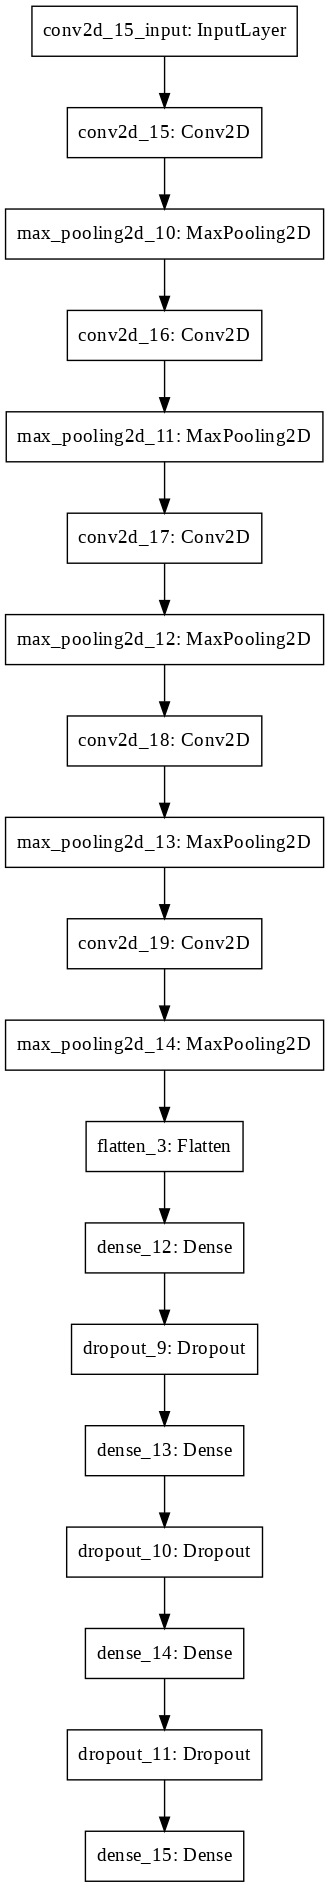

time: 164 ms


In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=100,
)

# MODEL-2 TRAINING

In [ ]:
for ep in range(1):
  batch_size = 100
  train_data_generator = LoadBatch(xtrain,ytrain,batch_size)
  valid_data_generator = LoadBatch(xtest,ytest,batch_size)
  cnn.fit(train_data_generator, epochs = 1, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)
  print(f'DONE for {ep}')

510/510 [==============================] - ETA: 0s - loss: 0.0684 - mae: 0.0935
Epoch 00001: val_loss improved from inf to 0.13887, saving model to /content/drive/My Drive/SDC/nw/zCONweights-0.1389.h5
510/510 [==============================] - 177s 348ms/step - loss: 0.0684 - mae: 0.0935 - val_loss: 0.1389 - val_mae: 0.2069
DONE for 0
time: 2min 58s


In [ ]:
for ep in range(40):
  batch_size = 100
  train_data_generator = LoadBatch(xtrain,ytrain,batch_size)
  valid_data_generator = LoadBatch(xtest,ytest,batch_size)
  cnn.fit(train_data_generator, epochs = 1, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)
  print(f'DONE for {ep}')

510/510 [==============================] - ETA: 0s - loss: 0.0669 - mae: 0.0877
Epoch 00001: val_loss improved from 0.13887 to 0.13189, saving model to /content/drive/My Drive/SDC/nw/zCONweights-0.1319.h5
510/510 [==============================] - 177s 348ms/step - loss: 0.0669 - mae: 0.0877 - val_loss: 0.1319 - val_mae: 0.1907
DONE for 0
510/510 [==============================] - ETA: 0s - loss: 0.0657 - mae: 0.0825
Epoch 00001: val_loss did not improve from 0.13189
510/510 [==============================] - 179s 351ms/step - loss: 0.0657 - mae: 0.0825 - val_loss: 0.1322 - val_mae: 0.1951
DONE for 1
510/510 [==============================] - ETA: 0s - loss: 0.0651 - mae: 0.0801
Epoch 00001: val_loss improved from 0.13189 to 0.12369, saving model to /content/drive/My Drive/SDC/nw/zCONweights-0.1237.h5
510/510 [==============================] - 177s 347ms/step - loss: 0.0651 - mae: 0.0801 - val_loss: 0.1237 - val_mae: 0.1820
DONE for 2
510/510 [==============================] - ETA: 0s 

In [ ]:
for ep in range(40):
  batch_size = 100
  train_data_generator = LoadBatch(xtrain,ytrain,batch_size)
  valid_data_generator = LoadBatch(xtest,ytest,batch_size)
  cnn.fit(train_data_generator, epochs = 1, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)
  print(f'DONE for {ep}')

510/510 [==============================] - ETA: 0s - loss: 0.0612 - mae: 0.0569
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 163s 319ms/step - loss: 0.0612 - mae: 0.0569 - val_loss: 0.1311 - val_mae: 0.1763
DONE for 0
510/510 [==============================] - ETA: 0s - loss: 0.0611 - mae: 0.0568
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 163s 320ms/step - loss: 0.0611 - mae: 0.0568 - val_loss: 0.1100 - val_mae: 0.1508
DONE for 1
510/510 [==============================] - ETA: 0s - loss: 0.0615 - mae: 0.0592
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 164s 321ms/step - loss: 0.0615 - mae: 0.0592 - val_loss: 0.1101 - val_mae: 0.1492
DONE for 2
510/510 [==============================] - ETA: 0s - loss: 0.0615 - mae: 0.0592
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 164s 322ms/step - loss: 0

In [ ]:
for ep in range(40):
  batch_size = 100
  train_data_generator = LoadBatch(xtrain,ytrain,batch_size)
  valid_data_generator = LoadBatch(xtest,ytest,batch_size)
  cnn.fit(train_data_generator, epochs = 1, steps_per_epoch = len(xtrain) // batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)
  print(f'DONE for {ep}')

510/510 [==============================] - ETA: 0s - loss: 0.0604 - mae: 0.0510
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 165s 323ms/step - loss: 0.0604 - mae: 0.0510 - val_loss: 0.1225 - val_mae: 0.1746
DONE for 0
510/510 [==============================] - ETA: 0s - loss: 0.0604 - mae: 0.0510
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 164s 322ms/step - loss: 0.0604 - mae: 0.0510 - val_loss: 0.1188 - val_mae: 0.1663
DONE for 1
510/510 [==============================] - ETA: 0s - loss: 0.0604 - mae: 0.0507
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 165s 323ms/step - loss: 0.0604 - mae: 0.0507 - val_loss: 0.1259 - val_mae: 0.1722
DONE for 2
510/510 [==============================] - ETA: 0s - loss: 0.0604 - mae: 0.0508
Epoch 00001: val_loss did not improve from 0.10061
510/510 [==============================] - 164s 322ms/step - loss: 0

In [ ]:
 cnn.fit(train_data_generator, epochs = 15, steps_per_epoch = len(xtrain)// batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/15
510/510 [==============================] - ETA: 0s - loss: 0.2118 - mae: 0.2317
Epoch 00001: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.2317.h5
510/510 [==============================] - 194s 380ms/step - loss: 0.2118 - mae: 0.2317 - val_loss: 0.1387 - val_mae: 0.2220
Epoch 2/15
510/510 [==============================] - ETA: 0s - loss: 0.1111 - mae: 0.1599WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.1599.h5
510/510 [==============================] - 128s 251ms/step - loss: 0.1111 - mae: 0.1599
Epoch 3/15
510/510 [==============================] - ETA: 0s - loss: 0.0794 - mae: 0.1218
Epoch 00003: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.1218.h5
5

time: 31min 49s


In [ ]:
 cnn.fit(train_data_generator, epochs = 5, steps_per_epoch = len(xtrain)// batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/5
510/510 [==============================] - ETA: 0s - loss: 0.0630 - mae: 0.0693
Epoch 00001: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.0693.h5
510/510 [==============================] - 156s 305ms/step - loss: 0.0630 - mae: 0.0693 - val_loss: 0.1112 - val_mae: 0.1548
Epoch 2/5
510/510 [==============================] - ETA: 0s - loss: 0.0624 - mae: 0.0680WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.0680.h5
510/510 [==============================] - 124s 242ms/step - loss: 0.0624 - mae: 0.0680
Epoch 3/5
510/510 [==============================] - ETA: 0s - loss: 0.0628 - mae: 0.0680
Epoch 00003: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.0680.h5
510/

time: 10min 49s


In [ ]:
batch_size = 100
train_data_generator = LoadBatch(xtrain,ytrain,batch_size)
valid_data_generator = LoadBatch(xtest,ytest,batch_size)

time: 3.78 ms


In [ ]:
 cnn.fit(train_data_generator, epochs = 10, steps_per_epoch = len(xtrain)// batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/10
510/510 [==============================] - ETA: 0s - loss: 0.0666 - mae: 0.0774
Epoch 00001: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.0774.h5
510/510 [==============================] - 155s 303ms/step - loss: 0.0666 - mae: 0.0774 - val_loss: 0.1098 - val_mae: 0.1501
Epoch 2/10
510/510 [==============================] - ETA: 0s - loss: 0.0619 - mae: 0.0657WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.0657.h5
510/510 [==============================] - 126s 247ms/step - loss: 0.0619 - mae: 0.0657
Epoch 3/10
510/510 [==============================] - ETA: 0s - loss: 0.0620 - mae: 0.0634
Epoch 00003: saving model to /content/drive/My Drive/SDC/nw/zCNNweights-0.0634.h5
5

time: 21min 2s


In [ ]:
cnn.fit(train_data_generator, epochs = 10, steps_per_epoch = len(xtrain)// batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/10
510/510 [==============================] - ETA: 0s - loss: 0.1044 - mae: 0.1413
Epoch 00001: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.1413.h5
510/510 [==============================] - 161s 316ms/step - loss: 0.1044 - mae: 0.1413 - val_loss: 0.1162 - val_mae: 0.1913
Epoch 2/10
510/510 [==============================] - ETA: 0s - loss: 0.0673 - mae: 0.0901WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 127 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0901.h5
510/510 [==============================] - 129s 252ms/step - loss: 0.0673 - mae: 0.0901
Epoch 3/10
510/510 [==============================] - ETA: 0s - loss: 0.0657 - mae: 0.0802
Epoch 00003: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0802.h5
510/

time: 22min 3s


In [ ]:
cnn.fit(train_data_generator, epochs = 10, steps_per_epoch = len(xtrain)// batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/10
398/398 [==============================] - ETA: 0s - loss: 0.0619 - mae: 0.0643
Epoch 00001: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0643.h5
398/398 [==============================] - 157s 394ms/step - loss: 0.0619 - mae: 0.0643 - val_loss: 0.1084 - val_mae: 0.1749
Epoch 2/10
398/398 [==============================] - ETA: 0s - loss: 0.0635 - mae: 0.0689WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 99 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0689.h5
398/398 [==============================] - 128s 321ms/step - loss: 0.0635 - mae: 0.0689
Epoch 3/10
398/398 [==============================] - ETA: 0s - loss: 0.0624 - mae: 0.0644
Epoch 00003: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0644.h5
398/3

time: 21min 45s


In [ ]:
cnn.fit(train_data_generator, epochs = 10, steps_per_epoch = len(xtrain)// batch_size, verbose = 1 ,validation_data = valid_data_generator, validation_steps = len(xtest) // batch_size, callbacks=callbacks_l)

Epoch 1/10
398/398 [==============================] - ETA: 0s - loss: 0.0610 - mae: 0.0589
Epoch 00001: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0589.h5
398/398 [==============================] - 155s 390ms/step - loss: 0.0610 - mae: 0.0589 - val_loss: 0.1101 - val_mae: 0.1778
Epoch 2/10
398/398 [==============================] - ETA: 0s - loss: 0.0615 - mae: 0.0587WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 99 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0587.h5
398/398 [==============================] - 127s 320ms/step - loss: 0.0615 - mae: 0.0587
Epoch 3/10
398/398 [==============================] - ETA: 0s - loss: 0.0614 - mae: 0.0587
Epoch 00003: saving model to /content/drive/My Drive/SDC/nw/zAMweights-0.0587.h5
398/3

time: 21min 37s
